# Classifying Images with GoogLeNet and some help from OpenCV 

In [1]:
# import necessary packages
import numpy as np
import time
import cv2
from imutils import paths # to define paths to images
import matplotlib.pyplot as  plt 
%matplotlib inline

Let's define paths to our Caffe model of GoogLeNet, ImageNet labels and path to a directory of images  

In [2]:
images_path = "images\\"

caffe_model_path = "..\\DNN_MODELS\\bvlc_googlenet.caffemodel"
model_architecture_path = "..\\DNN_MODELS\\bvlc_googlenet.prototxt"

labels_path = "synset_words.txt"

Let's check out the data we would like to label

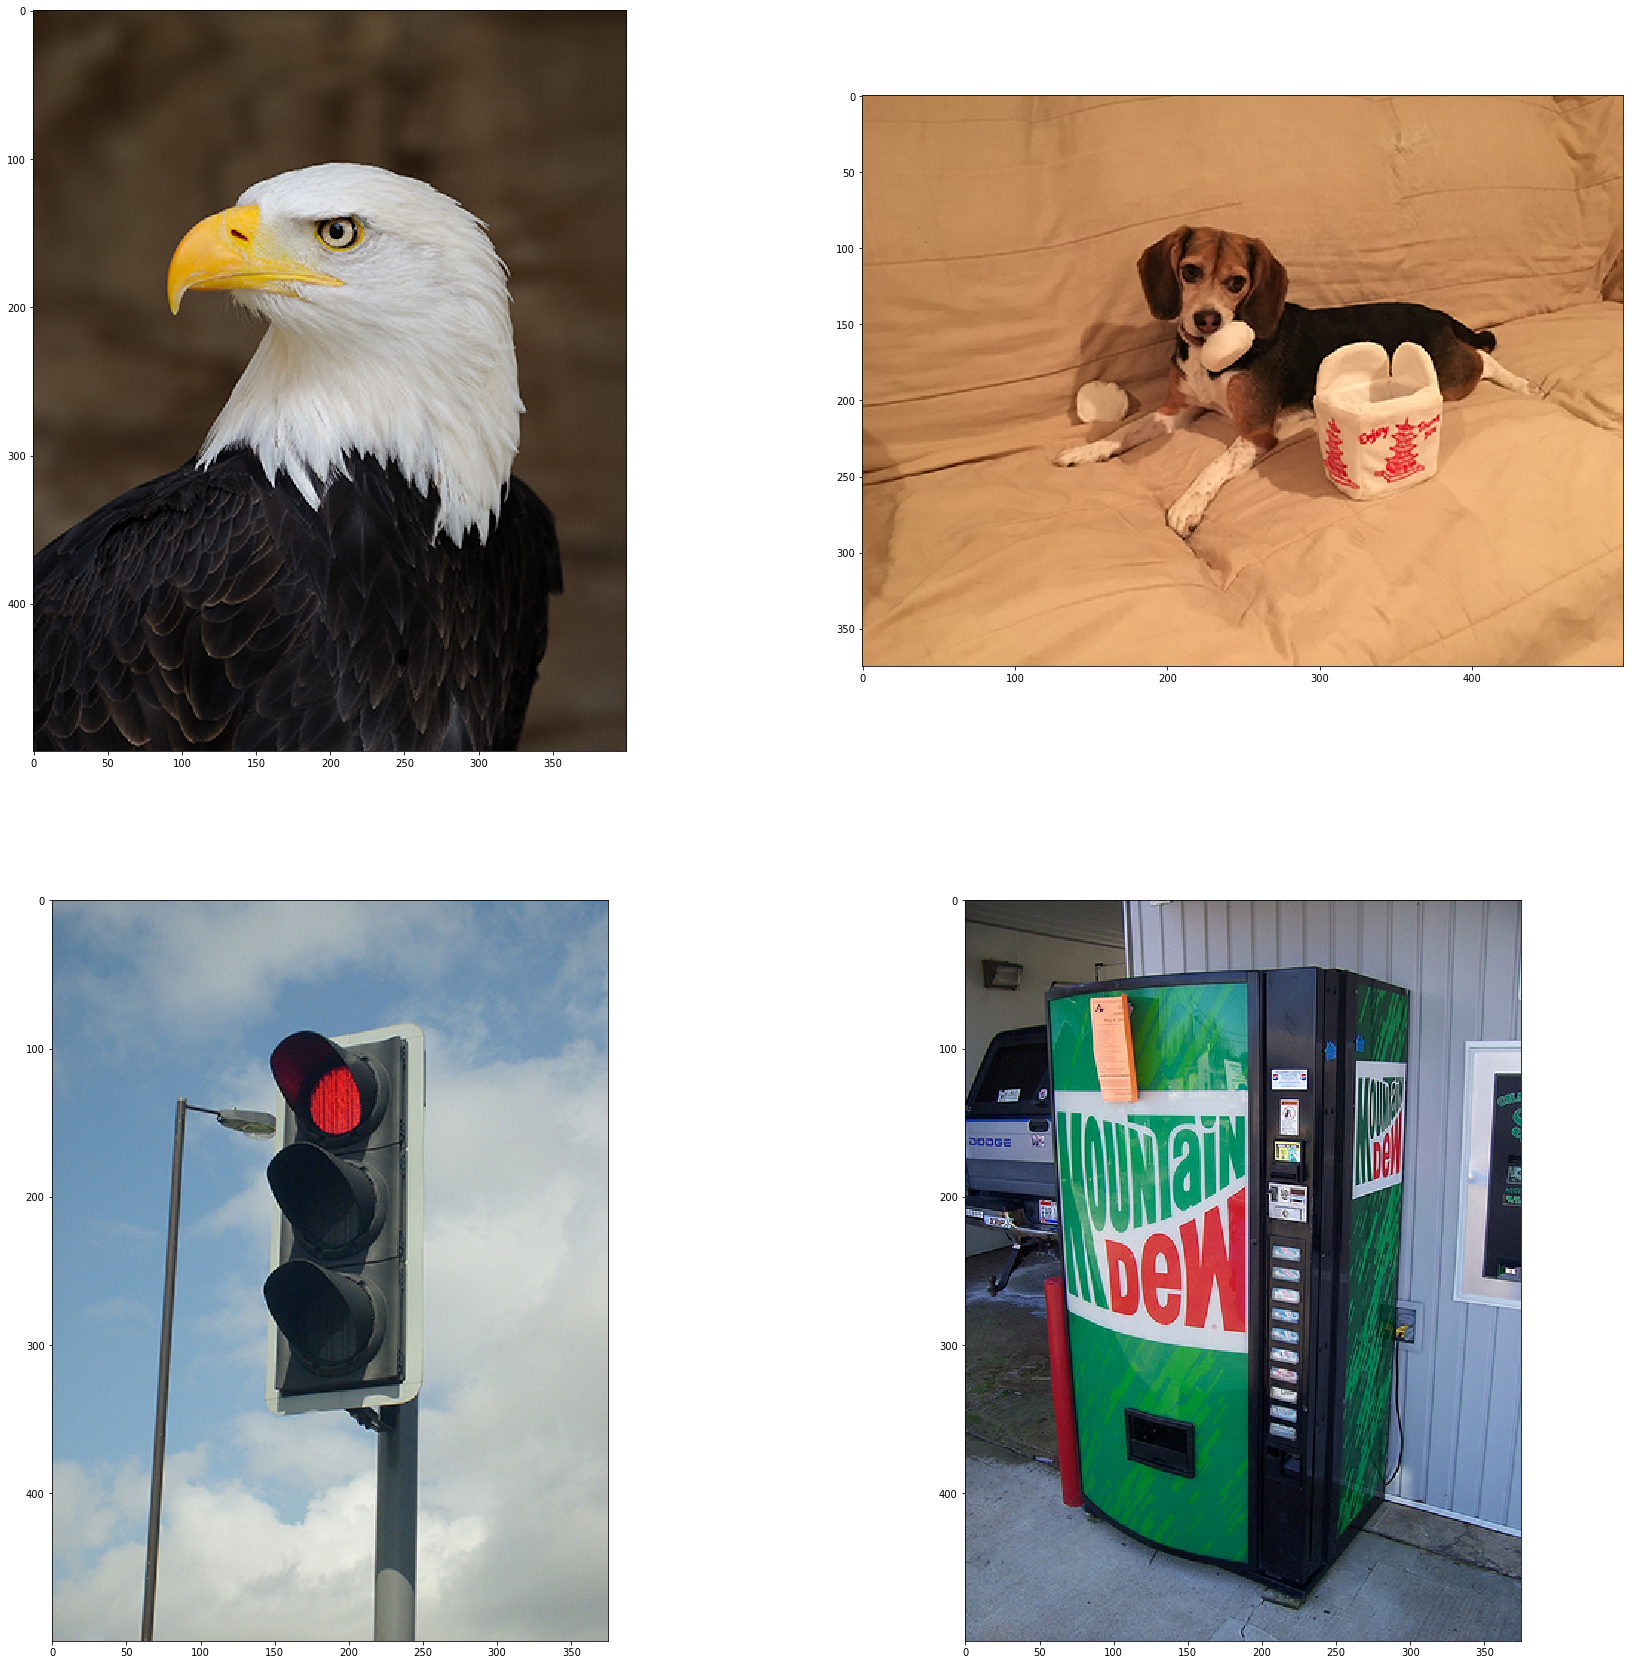

In [3]:
fig, ax = plt.subplots(2,2, figsize=(30,30))

ax= ax.ravel() # flatten the numpy array of plots for easy iteration

count = 0 # counter to iterate over subplots
for imgPath in (paths.list_images(images_path)):
    img = cv2.imread(imgPath)
    ax[count].imshow(img[...,::-1])
    count+=1
    
plt.show()

Lets's also take a look at the labels file.

`n01491361 tiger shark, Galeocerdo cuvieri
n01494475 hammerhead, hammerhead shark
n01496331 electric ray, crampfish, numbfish, torpedo
n01498041 stingray
n01514668 cock
n01514859 hen
...`

As you can see, we have a unique identifier followed by a space, some class labels, and a new-line. Parsing this file line-by-line is straightforward


In [4]:
# load the class labels file from disk
rows = open(labels_path).read().strip().split("\n")
classes = [r[r.find(" ")+1:].split(",")[0] for r in rows]

Let's see what we have parsed

In [5]:
classes[:5] #only first 5 labels

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

Now that we ahave taken care of the parsing of labeles, let's get to the meat and potatoes, using the model.

[INFO] loading model...
[INFO] classification took 0.39917 seconds


Top-5 predictions for image#1
[INFO] 1, label: bald eagle, probability: 0.96768
[INFO] 2, label: kite, probability: 0.031964
[INFO] 3, label: vulture, probability: 0.00023596
[INFO] 4, label: albatross, probability: 6.3654e-05
[INFO] 5, label: black grouse, probability: 1.6147e-05


[INFO] classification took 0.36893 seconds


Top-5 predictions for image#2
[INFO] 1, label: beagle, probability: 0.81137
[INFO] 2, label: Labrador retriever, probability: 0.031416
[INFO] 3, label: bluetick, probability: 0.023929
[INFO] 4, label: EntleBucher, probability: 0.017507
[INFO] 5, label: Greater Swiss Mountain dog, probability: 0.01444


[INFO] classification took 0.4121 seconds


Top-5 predictions for image#3
[INFO] 1, label: traffic light, probability: 1.0
[INFO] 2, label: pole, probability: 4.9961e-07
[INFO] 3, label: spotlight, probability: 3.4974e-08
[INFO] 4, label: street sign, probability: 3.3622e-08
[INFO] 5, label: louds

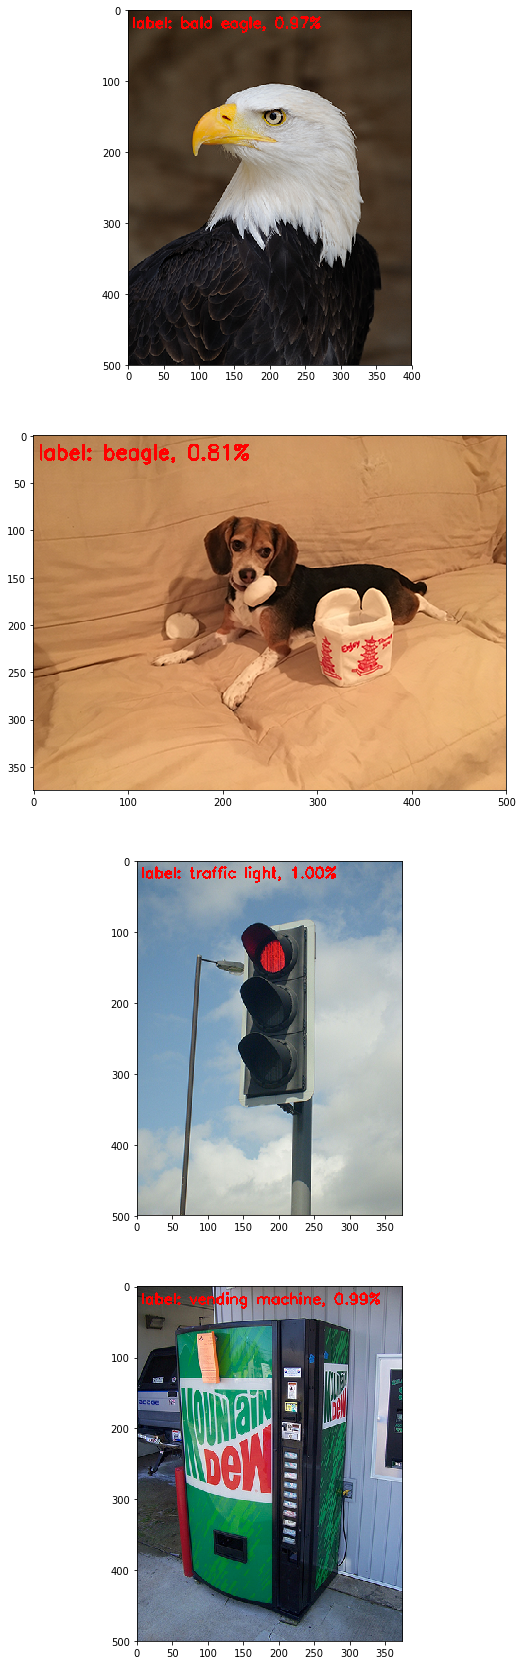

In [8]:
fig, ax = plt.subplots(4,1, figsize=(30,30))
# ax= ax.ravel() # flatten the numpy array of plots for easy iteration


# load the model
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(model_architecture_path, caffe_model_path)

#loop over all the images in the directory
for imgNum,imgPath in enumerate(paths.list_images(images_path)):
    # read the image
    img = cv2.imread(imgPath)
    
    # our CNN, GoogLeNet requires we fixed spatial dimensions of input 
    # image(s) so we need to esure all images passed to it are of 224x224
    # pixels and should be mean normalized on each channel, BGR, according
    # to spec during training time which was (104, 117, 123)
    blob = cv2.dnn.blobFromImage(img, scalefactor=1, size=(224,224), mean=(104, 117, 123))
    
    # set the blob as input to the network and perform a forawrd pass to
    # obtain prediction
    net.setInput(blob)
    start = time.time()
    prediction = net.forward()
    end = time.time()
    print("[INFO] classification took {:.5} seconds".format(end - start))
    
    # sort the indexes if the probabilities in descending order(higher
    # probabiblity first) and grabb the top-5 preictions
    idxs = np.argsort(prediction[0])[::-1][:5]
    
    print("\n\nTop-5 predictions for image#{}".format(imgNum+1))
    
    # loop over the top-5 predictions and label them
    for (i, idx) in enumerate(idxs):
        if i == 0:
            # draw the top prediction on the image
            text = "label: {}, {:.2f}%".format(classes[idx], prediction[0][idx])
            cv2.putText(img, text, (5,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        # display the prdicted label + associated probaility
        print("[INFO] {}, label: {}, probability: {:.5}".format(i+1, classes[idx], 
                                                                prediction[0][idx]))
    
    print("\n")
    # display the image
    ax[imgNum].imshow(img[...,::-1])

plt.show()